In [592]:
# 1a Entrega Python - 08-11-2023 - Igor Ambrozini
#Arquivo no formato .ipynb, criado e editado no VS Code.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [527]:

# 1. Função que exibe características do DataFrame (10 pts):
#Crie uma função que carregue o arquivo "sales_data.csv" para um DataFrame e exiba informações gerais sobre o DataFrame, como:

def Print_df_char():
    # Descrição da Função:
    print("Informações gerais sobre o DataFrame sales_data.csv: \n")

    #  Importando dados para criar o DataFrame:
    df = pd.read_csv('sales_data.csv')

    # Exibir número de linhas:
    print('Número de linhas:',len(df.index),'\n')

    # Exibir número de colunas:
    print('Número de colunas:',len(df.columns),'\n')

    ## Exibir o  tipo de dados:
    tipos_dados = df.dtypes
    print('Tipos de dados:\n', tipos_dados,'\n')

    # Exibir o nome das colunas e linhas:
    lista_colunas = list(df.columns)
    print('Nome das colunas:\n', lista_colunas, '\n')

    lista_linhas = np.array(df.index)
    print('Nome das linhas: \n', lista_linhas, '\n')

    # Exibir as primeiras e últimas 10 linhas do DataFrame:
    print('10 primeiras linhas do DataFrame:\n',df.head(10),'\n')

    #10 últimas:
    print('10 últimas linhas do DataFrame:\n', df.tail(10))

    return df

df = Print_df_char();

Informações gerais sobre o DataFrame sales_data.csv: 

Número de linhas: 365 

Número de colunas: 7 

Tipos de dados:
 Data                object
Produto             object
Categoria           object
Preço              float64
Quantidade           int64
Stock                int64
Canal de Vendas     object
dtype: object 

Nome das colunas:
 ['Data', 'Produto', 'Categoria', 'Preço', 'Quantidade', 'Stock', 'Canal de Vendas'] 

Nome das linhas: 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 

In [528]:
# 2. Vendas mensais totais (10 pts):
#Calcule e exiba as vendas totais para cada mês presente no DataFrame.

#Criar nova coluna Month no DataFrame:
df['Month'] = pd.DatetimeIndex(df['Data']).month

#Agrupar por período (mês):
new_df = df.groupby(['Month']).sum()

#Imprimir vendas por mês:
print('Vendas acumuladas por mês: \n')
display(new_df['Preço'])

#alternativa: df2 = pd.DataFrame(new_df['Preço']); display(df2);

Vendas acumuladas por mês: 



Month
1     1858.73
2     1606.98
3     1784.13
4     1523.08
5     1778.69
6     1610.96
7     1794.51
8     1751.04
9     1564.34
10    1830.22
11    1653.79
12    1591.73
Name: Preço, dtype: float64

In [529]:
# 3. Produtos mais vendidos (10 pts):
#Identifique os produtos mais vendidos e exiba seus nomes e quantidades vendidas.

#Definir tamanho do TOP (já que não foi informada a quantidade de itens mais vendidos a serem exibidos):
top = int(input('Informe quantidade de itens mais vendidos desejada (TOP):'))

#Agrupar DF por produto:
df3 = df.groupby(['Produto']).sum()

#Ordernar DF por quantidade e Imprimir seus nomes e quantidades vendidas:
print('Top',top,'produtos mais vendidos:')
display(df3['Quantidade'].sort_values(ascending=False).head(top))

Top 10 produtos mais vendidos:


Produto
Produto E-A    157
Produto D-E    156
Produto D-A    139
Produto E-R    139
Produto B-R    135
Produto D-R    135
Produto B-E    130
Produto F-E    127
Produto A-R    116
Produto B-A    116
Name: Quantidade, dtype: int64

In [530]:
# 4. Média de preço por categoria de produto (10 pts):
#Calcule a média de preço para cada categoria de produto e exiba os resultados.

#Agrupar DF por categorias:
df4 = df.groupby(by='Categoria')

#Imprimir média da coluna Preço, por categoria:
print('Média de preço por categoria:')
display (df4['Preço'].mean())

Média de preço por categoria:


Categoria
Alimentos      57.621102
Eletrónicos    55.305126
Roupas         54.434375
Name: Preço, dtype: float64

In [531]:
# 5. Total de vendas por canal de vendas (10 pts):
#Calcule o total de vendas para cada canal de vendas e exiba os resultados.

#5.1 Podemos fazer por agrupando DF por Canal de Vendas:
df5 = df.groupby('Canal de Vendas').sum()

#5.2 Imprimir total de vendas por tipo de canal:
print('Total de Vendas por Canal:')
display(df5['Quantidade'])

#Ou alternativamente podemos fazer:
vendas_on=df[df['Canal de Vendas']=='Online'].sum()
vendas_off=df[df['Canal de Vendas']=='Offline'].sum()
print('Total de vendas Online: ',vendas_on['Quantidade'])
print('Total de vendas Offline: ',vendas_off['Quantidade'])


Total de Vendas por Canal:


Canal de Vendas
Offline    1076
Online      954
Name: Quantidade, dtype: int64

Total de vendas Online:  954
Total de vendas Offline:  1076


Análise de vendas do ano:  2023
                                                    0
Valor total das vendas no  ano              114609.14
Quantidade total de itens vendidos:              2030
Produto mais vendido:                     Produto E-A
Produto menos vendido:                    Produto A-E
Lucro do ano [Soma(Quantidade x Preço)]:    114609.14


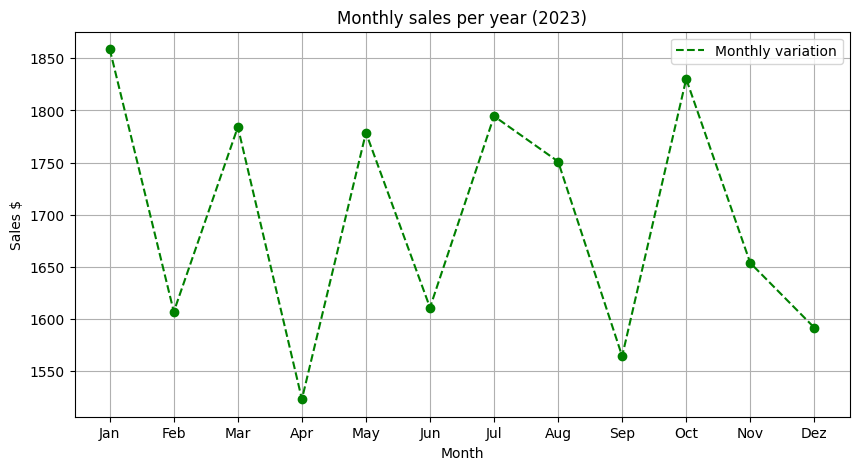

In [532]:
# 6. Análise de vendas por ano (10 pts):
#Analise as vendas por ano e exiba os resultados em gráficos ou tabelas informativas.

#Extraindo ano e criando a coluna Year:
df['Year'] = pd.DatetimeIndex(df['Data']).year

#Checando quais anos a serem avaliados:
Menor_ano = df.Year.min()
Maior_ano = df.Year.max()
if (Menor_ano == Maior_ano):
    print('Análise de vendas do ano: ', Menor_ano)
else:
    print('Análise de vendas dos anos: ', Menor_ano, 'até', Maior_ano)

#Análise de vendas por ano (variações mensais):

produto = df.groupby('Produto')['Produto'].sum().head(1)
mais_vendido = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)[:10].head(1)
menos_vendido = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True)[:10].head(1)
analise_vendas = {
    'Valor total das vendas no  ano' : (df['Quantidade']*df['Preço']).sum(),
    'Quantidade total de itens vendidos:': df['Quantidade'].sum(),
    'Produto mais vendido: ': mais_vendido.index[0],
    'Produto menos vendido: ': menos_vendido.index[0],
    'Lucro do ano [Soma(Quantidade x Preço)]:' : sum(df['Quantidade']*df['Preço'])
    }

#Imprimri dicionário como DF
print(pd.DataFrame.from_dict(analise_vendas, orient='index'))

#Vendas por mês no ano:
sales_month = list(df.groupby('Month')['Preço'].sum())

#Criando nova etiqueta para a série que vai gerar o gráfico de vendas pro ano
months = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dez']
pd.DatetimeIndex.months

#Gráfico de vendas durante o ano utilizando a biblioteca matplotlib:
graph = pd.Series(data=sales_month, index=months)
plt.figure(figsize=(10,5))
plt.plot(months, graph, 'g--', label='Monthly variation')
plt.plot(months, graph,'go')
plt.title('Monthly sales per year (2023)')
plt.xlabel('Month')
plt.ylabel('Sales $')
plt.grid('True')
plt.legend()
plt.show()



In [533]:
# 7. **Remoção de produtos com stock esgotado (5 pts):**
#Remova os produtos que têm stock igual a zero do DataFrame.

#Subconjunto DF de produtos com stock = 0:
zero = df[df['Stock']==0]

#Remover produtos do DF original com stock = 0:
df_remove_stock_zero = df
df_remove_stock_zero = df_remove_stock_zero.drop(zero.index)

#Imprimir nova DF atualizada (produtos com stock=0 removidos):
display(df_remove_stock_zero)

#Informar quantidade de produtos removida:
print('Total de produtos com estoque zero removidos: ', len(zero))
print('Quantidade de produtos atualizada: ', len(df_remove_stock_zero))

,Data,Produto,Categoria,Preço,Quantidade,Stock,Canal de Vendas,Month,Year
0,2023-01-01,Produto C-E,Eletrónicos,24.51,6,17,Offline,1,2023
1,2023-01-02,Produto A-A,Alimentos,26.89,5,31,Offline,1,2023
2,2023-01-03,Produto A-R,Roupas,19.50,9,46,Online,1,2023
3,2023-01-04,Produto E-R,Roupas,12.41,2,14,Offline,1,2023
5,2023-01-06,Produto B-R,Roupas,75.28,4,26,Offline,1,2023
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,Produto E-A,Alimentos,98.09,1,17,Offline,12,2023
361,2023-12-28,Produto A-A,Alimentos,94.02,2,27,Online,12,2023
362,2023-12-29,Produto C-A,Alimentos,39.21,4,45,Online,12,2023
363,2023-12-30,Produto D-R,Roupas,97.62,4,45,Online,12,2023


Total de produtos com estoque zero removidos:  7
Quantidade de produtos atualizada:  358


In [553]:
# 8. **Margem de lucro por produto (10 pts):**
#Calcule a margem de lucro para cada produto e exiba os resultados.

#Obter o custo dos produtos (não informado na tabela)
df['Custo'] = float(input('Informe um custo fixo para os produtos:'))

#Criar novas colunas Custo e Total Líquido = [(Preço-custo)*Quantidade] e Total Bruto = [Preço*Quantidade]
df['Total Bruto'] = df['Preço']*df['Quantidade']
df['Total Líquido'] = (df['Preço']-df['Custo'])*df['Quantidade']

#Remover coluna custo (só foi necessária para o cálculo)
df = df.drop(columns='Custo')

#Somar Total Bruto e Total Líquido por produtos (agrupar)
df_total = df.groupby(by='Produto').sum('Total Líquido')
df_total['Lucro por Produto (%)'] = df_total['Total Líquido']/df_total['Total Bruto']

#Exibir resultados por ordem decrescente (mais lucrativo para o menos lucrativo)
df_total.sort_values(by='Lucro por Produto (%)', ascending=False)

,Preço,Quantidade,Stock,Month,Year,Total Bruto,Total Líquido,Lucro por Produto (%)
Produto,,,,,,,,
Produto C-R,1172.65,88,379,104,36414,5820.00,4940.00,0.848797
Produto F-A,770.12,84,371,77,26299,5338.14,4498.14,0.842642
Produto A-A,1263.71,114,577,141,40460,7231.31,6091.31,0.842352
Produto D-E,1593.69,156,648,186,56644,9787.35,8227.35,0.840611
Produto B-A,1153.03,116,455,124,38437,7277.32,6117.32,0.840601
Produto B-E,1415.99,130,620,148,48552,8141.68,6841.68,0.840328
Produto A-E,707.18,53,264,74,24276,3298.56,2768.56,0.839324
Produto D-R,1407.79,135,622,173,48552,7987.59,6637.59,0.830988
Produto B-R,1092.33,135,675,151,42483,7751.15,6401.15,0.825832


In [599]:
#9. **Percentagem de vendas online vs. offline (5 pts):**
#Calcule a percentagem de vendas online e offline em relação ao total de vendas.

#Calcular quantidade total de vendas
total_vendas = len(df)

#Calcular quantidade de vendas online e offline
vendas_on = len(df[df['Canal de Vendas']=='Online'])
vendas_off = len(df[df['Canal de Vendas']=='Offline'])

#Exibir % de vendas (online e offline) em relação ao total de vendas
print('Total de vendas Online: ', round(vendas_on/total_vendas,2), '%.')
print('Total de vendas Offline: ', round(vendas_off/total_vendas,2), '%.')


Total de vendas Online:  0.48 %.
Total de vendas Offline:  0.52 %.


In [ ]:
#10. **Análise de Preços ao Longo do Tempo (20 pts)**
#Realize uma análise dos preços dos produtos ao longo do tempo para identificar tendências e variações nos preços. Pode seguir as seguintes etapas:

#**a.** Agrupe os dados por mês e calcule a média dos preços de todos os produtos em cada mês. **(5pts)**

In [ ]:
#**b.** Plote um gráfico de linha que mostre a média dos preços ao longo do tempo, com o eixo x representando os meses e o eixo y representando a média dos preços. **(5pts)**

In [ ]:
#**c.** Identifique os meses em que houve as maiores variações de preço (maior aumento e maior queda). **(5pts)**

In [ ]:
#**d.** Escreva uma breve análise dos resultados, destacando qualquer padrão ou tendência observada nos preços dos produtos ao longo do ano. **(5pts)**